# Calculate Free Cash Flow

## Setup

In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
%load_ext autoreload
%autoreload 2

<IPython.core.display.Javascript object>

In [3]:
# Import libraries
import pandas as pd
import numpy as np

from investing.config.file_paths import input_data, output_data, financial_statements
from investing.tools.functions import data_loader, sensitivity_plot

# Plottting libraries
import seaborn as sns

sns.set_style("whitegrid")
%matplotlib inline
%config InlineBackend.figure_format ='retina'

<IPython.core.display.Javascript object>

## Configure

In [4]:
# File names
companies_file = "company_names.csv"
income_file = "IncomeStatement.xlsx"
start_file = "start_data_dividends.csv"

<IPython.core.display.Javascript object>

## Load Data

In [5]:
# Load company names
df_names = pd.read_csv(input_data / companies_file)

<IPython.core.display.Javascript object>

In [6]:
df_dividend = df_names[df_names["type"] == "Dividend"].sort_values("ticker")
df_dividend

,ticker,name,type
0,AAL.L,AngloAmerican,Dividend
3,ALA.TO,AltaGas,Dividend
5,AQN,Algonquin,Dividend
6,AY,Atlantica,Dividend
8,BEPC,Brookfield Renewable,Dividend
9,BIPC,Brookfield Infrastructure,Dividend
14,BP.L,BP,Dividend
16,BTB-UN.TO,BTB REIT,Dividend
18,CVX,Chevron,Dividend
21,ENB,Enbridge,Dividend


<IPython.core.display.Javascript object>

## Build Company FCF

In [7]:
company_data = {}
for name in df_dividend["ticker"]:
    company_data[name] = data_loader(financial_statements / income_file, name, statement_type='income')

<IPython.core.display.Javascript object>

## FCF Growth

### Growth Forecasts

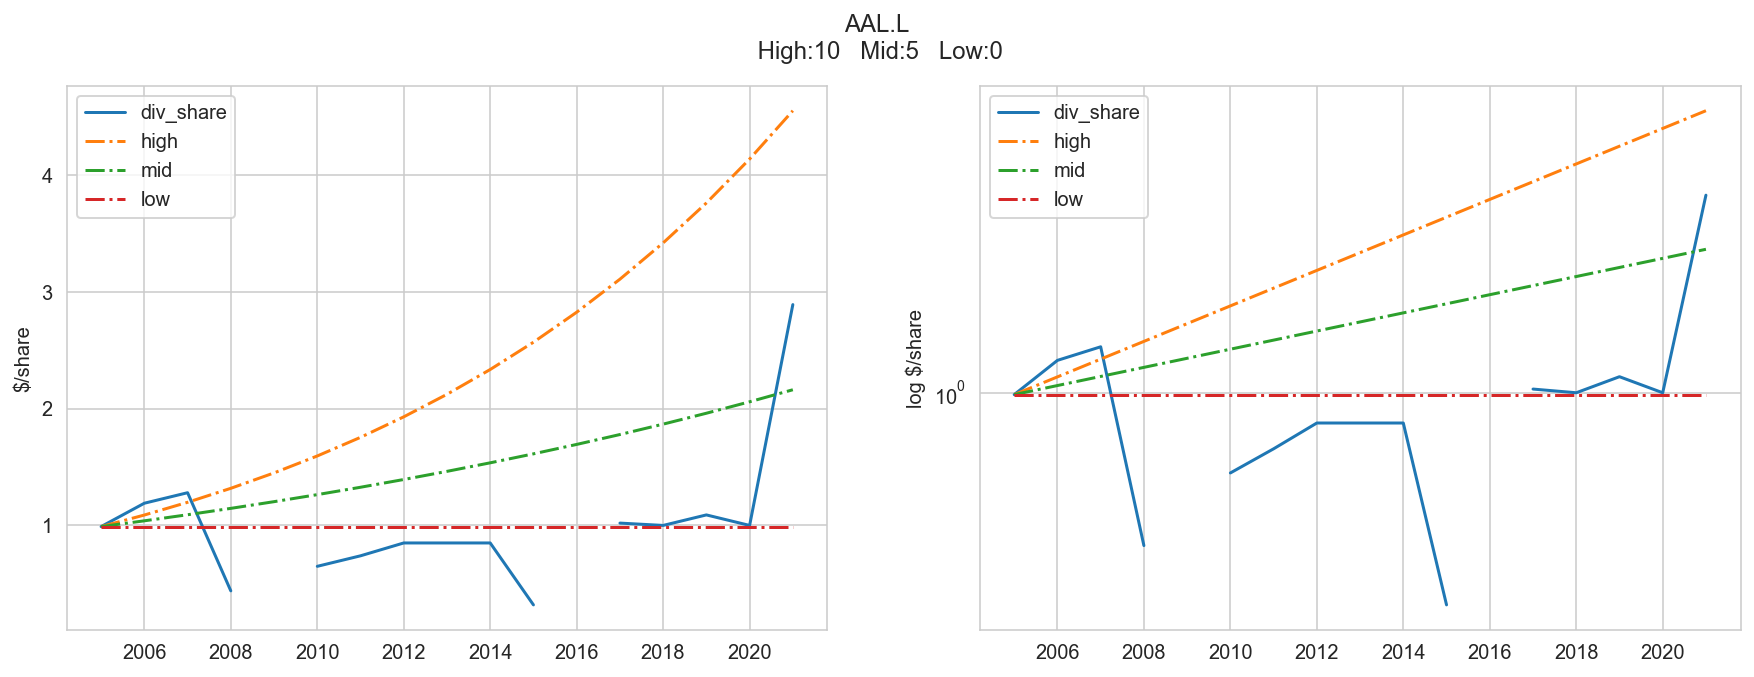

<IPython.core.display.Javascript object>

In [9]:
sensitivity_plot(company_data, "AAL.L", 10, 5, 0, 'div')

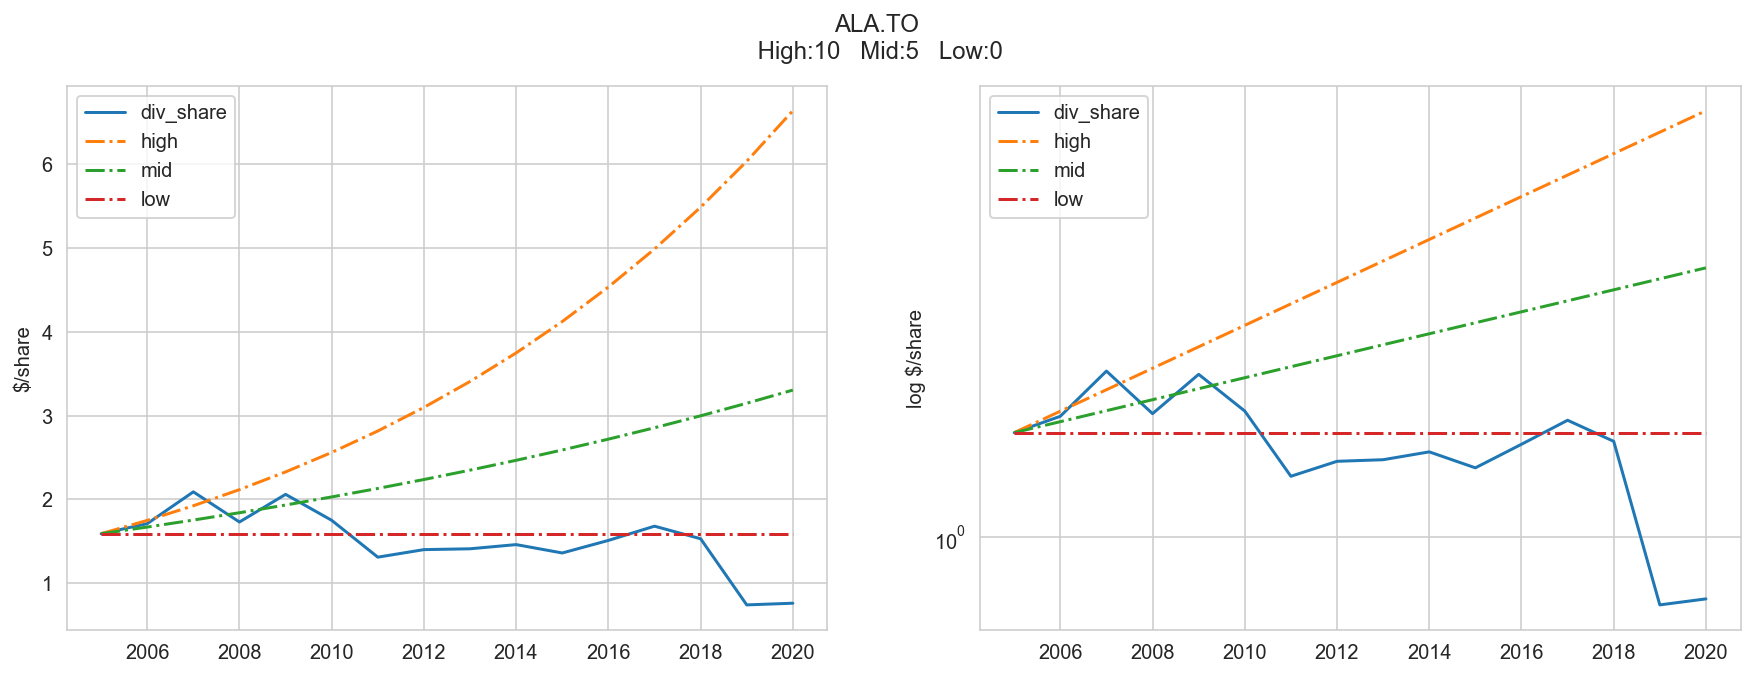

<IPython.core.display.Javascript object>

In [10]:
sensitivity_plot(company_data, "ALA.TO", 10, 5, 0, 'div')

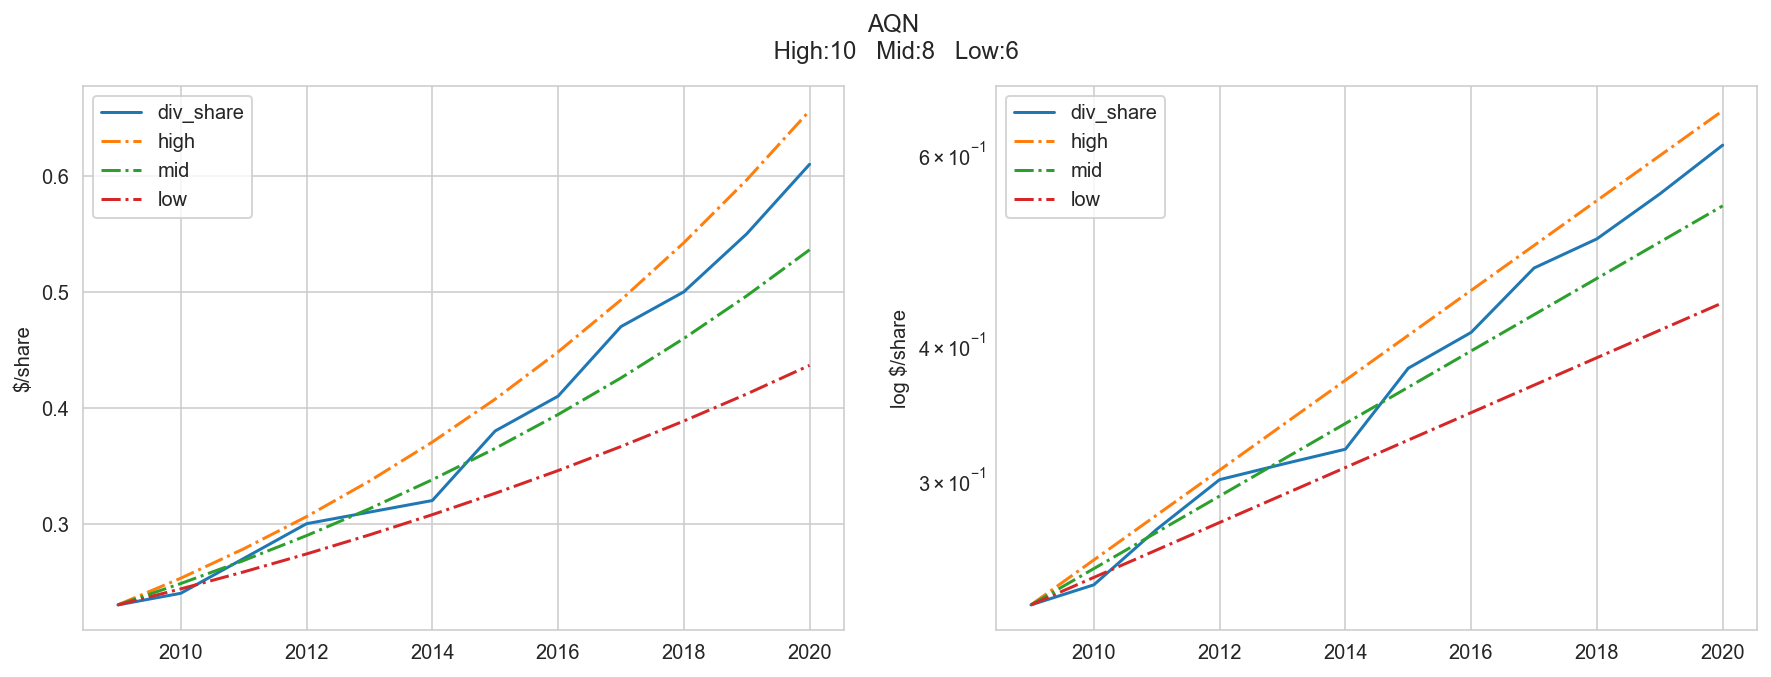

<IPython.core.display.Javascript object>

In [12]:
sensitivity_plot(company_data, "AQN", 10, 8, 6, 'div', start_at=2009)

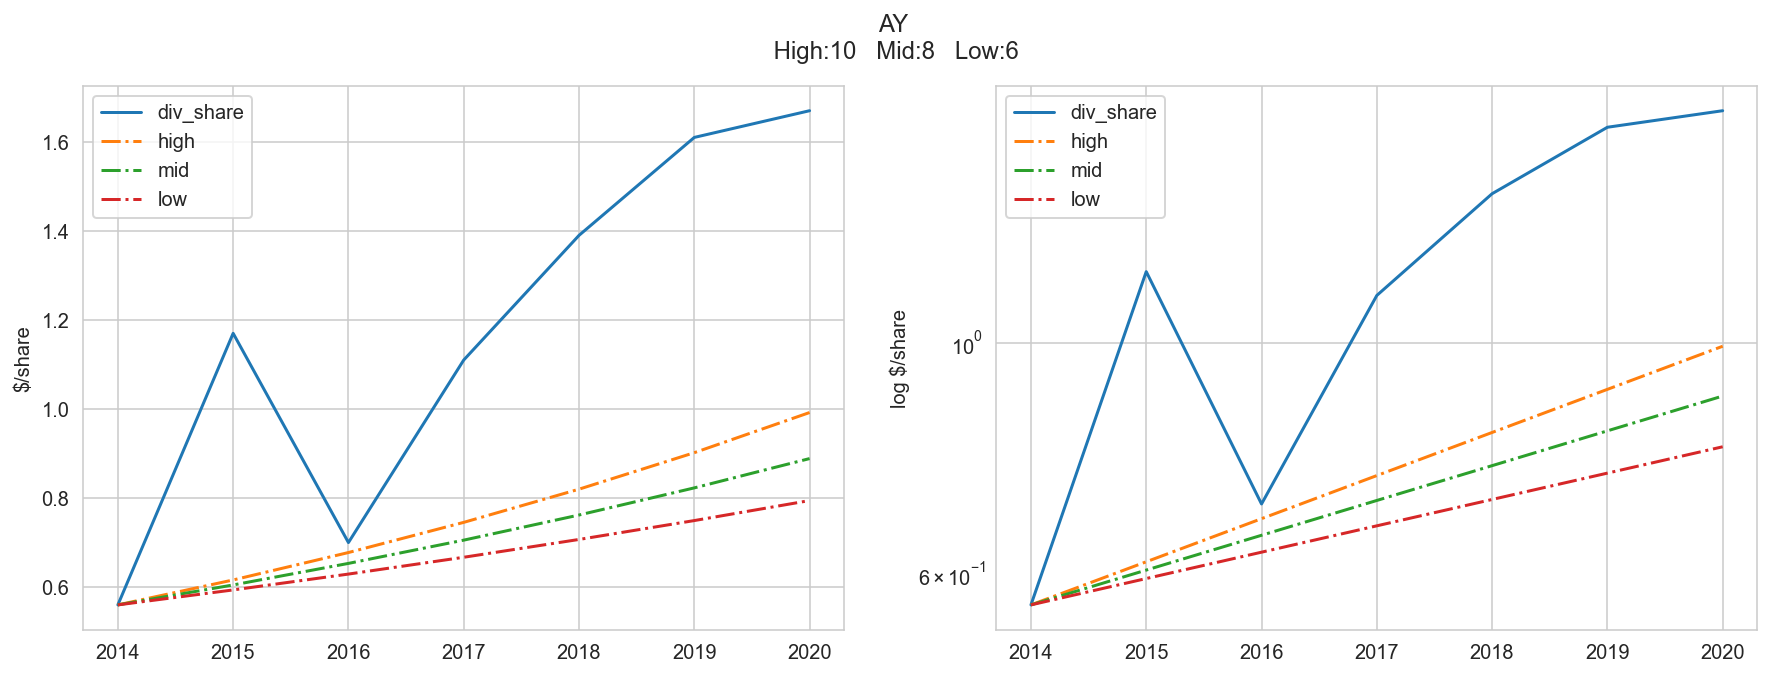

<IPython.core.display.Javascript object>

In [13]:
sensitivity_plot(company_data, "AY", 10, 8, 6, 'div')

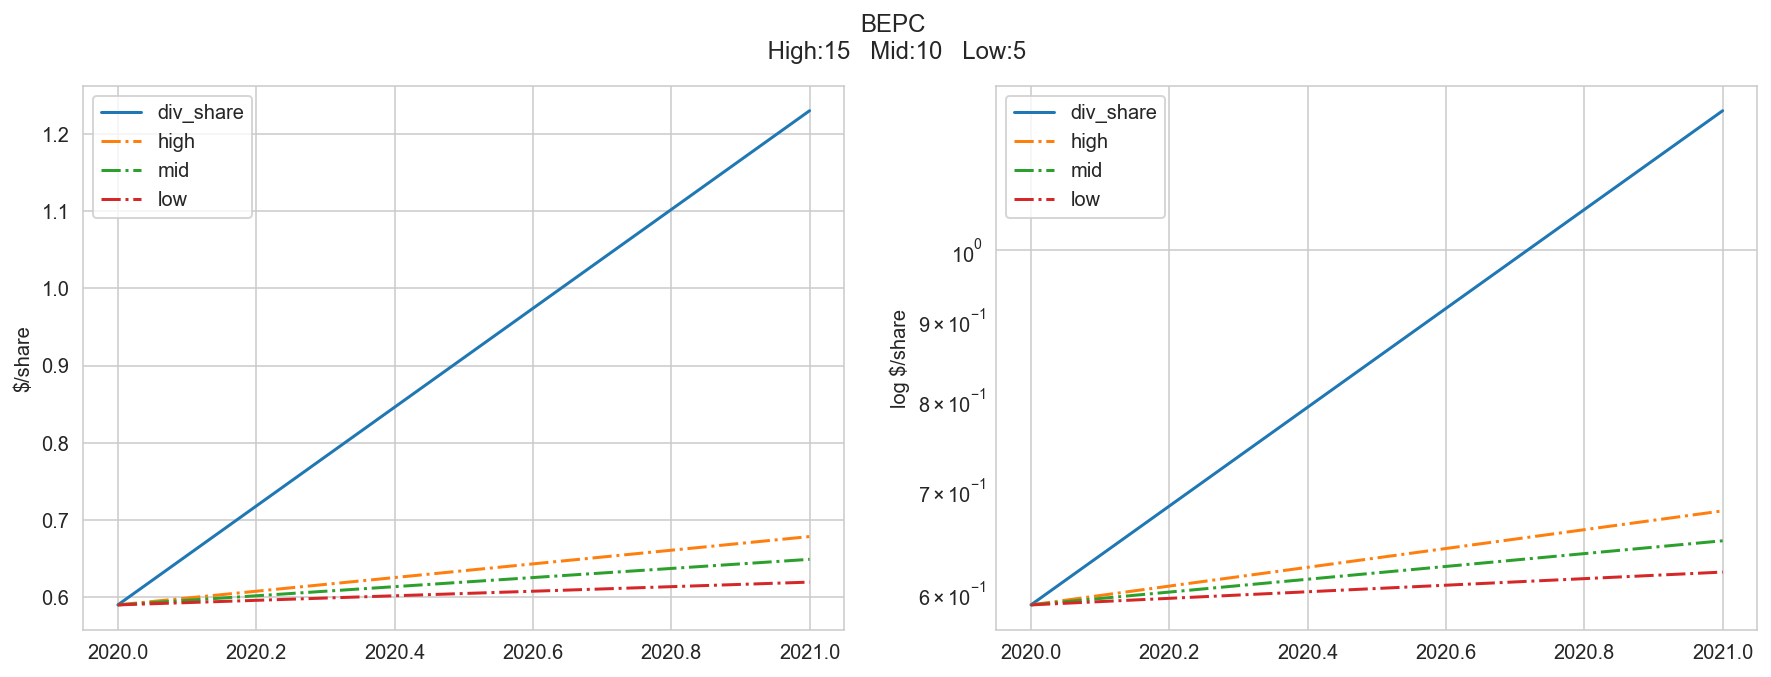

<IPython.core.display.Javascript object>

In [14]:
sensitivity_plot(company_data, "BEPC", 15, 10, 5, 'div')

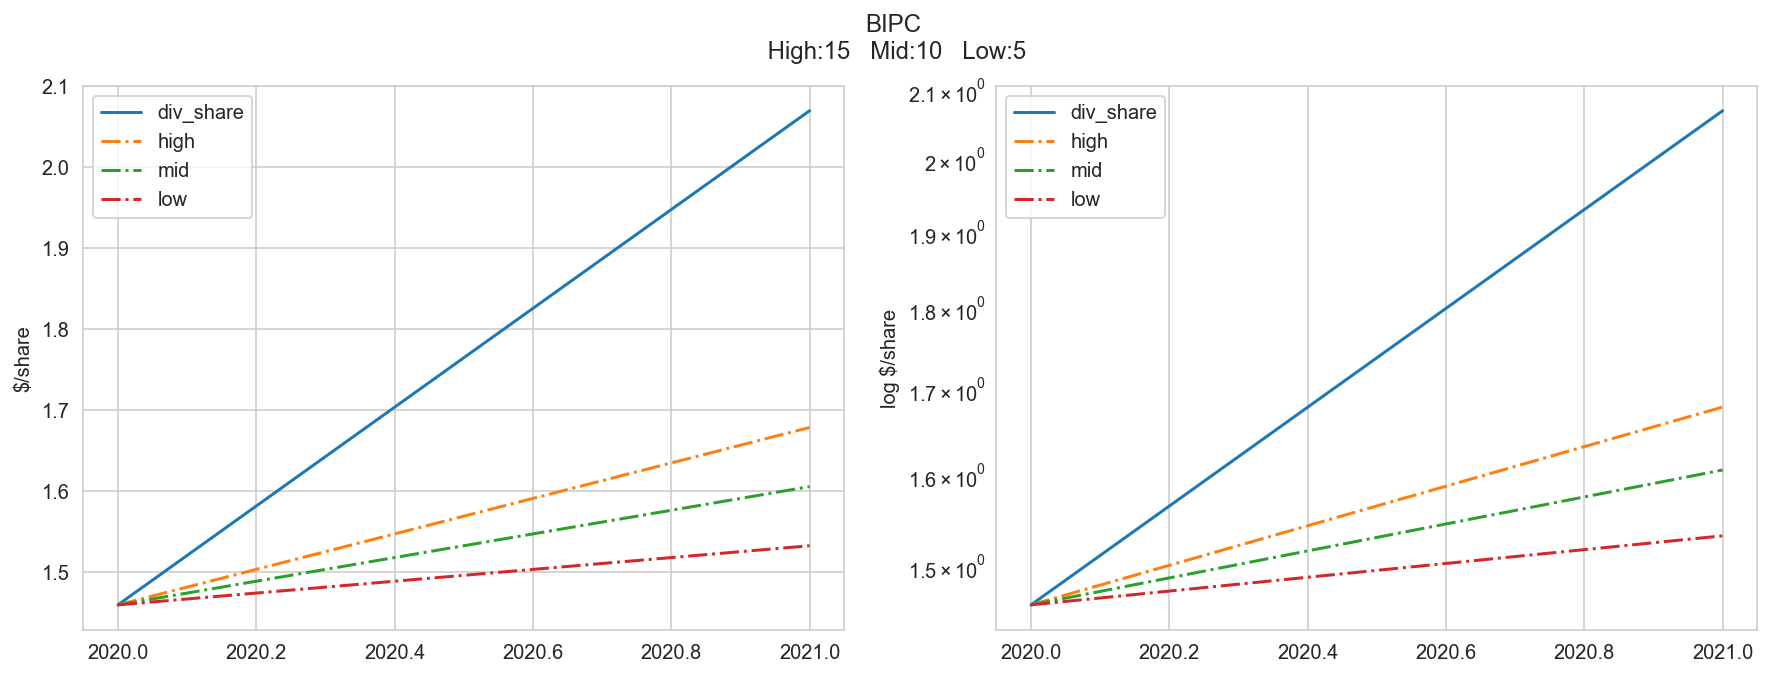

<IPython.core.display.Javascript object>

In [15]:
sensitivity_plot(company_data, "BIPC", 15, 10, 5, 'div')

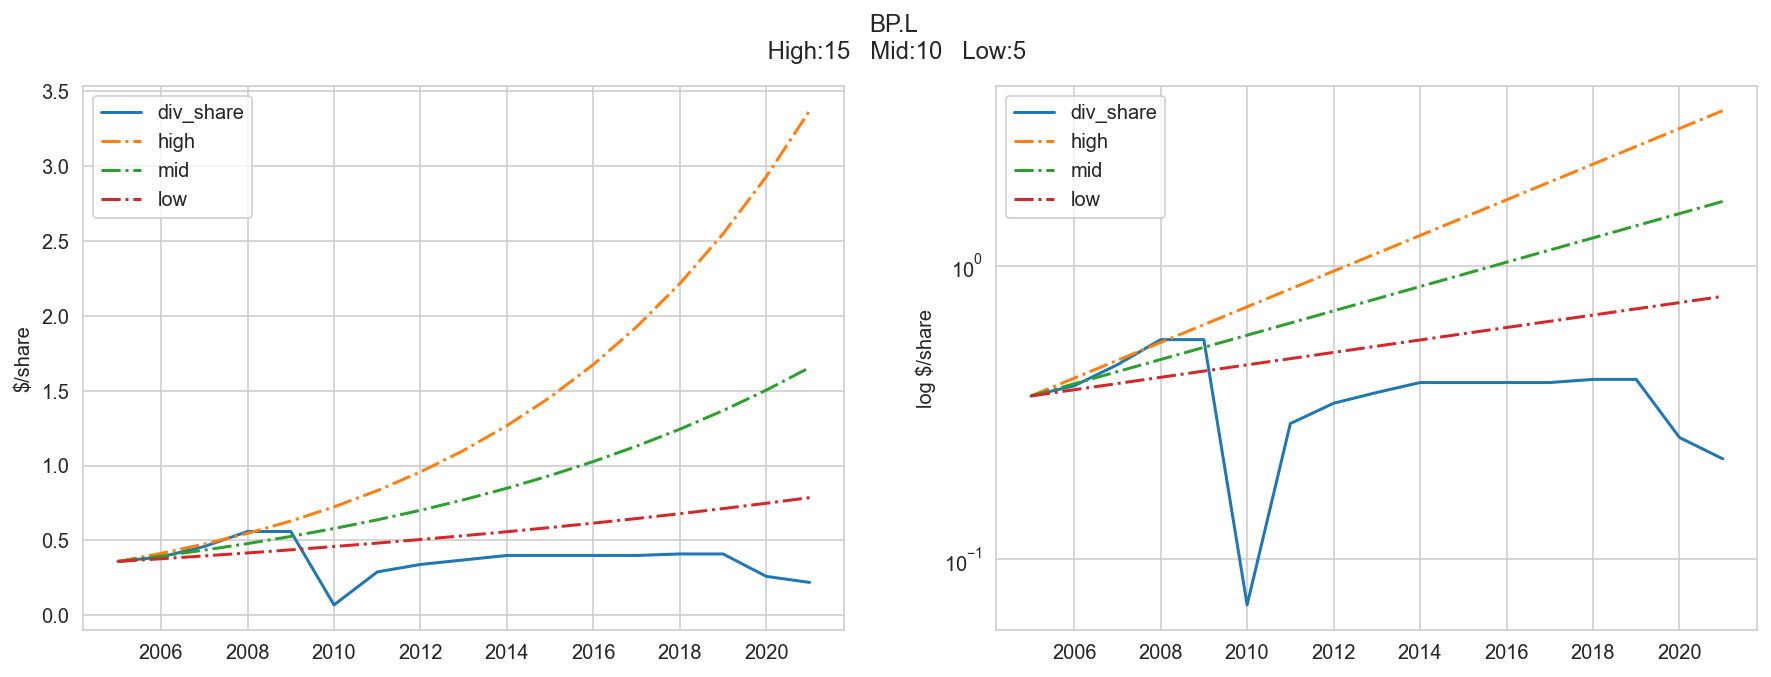

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "BP.L", 15, 10, 5, fcf=False)

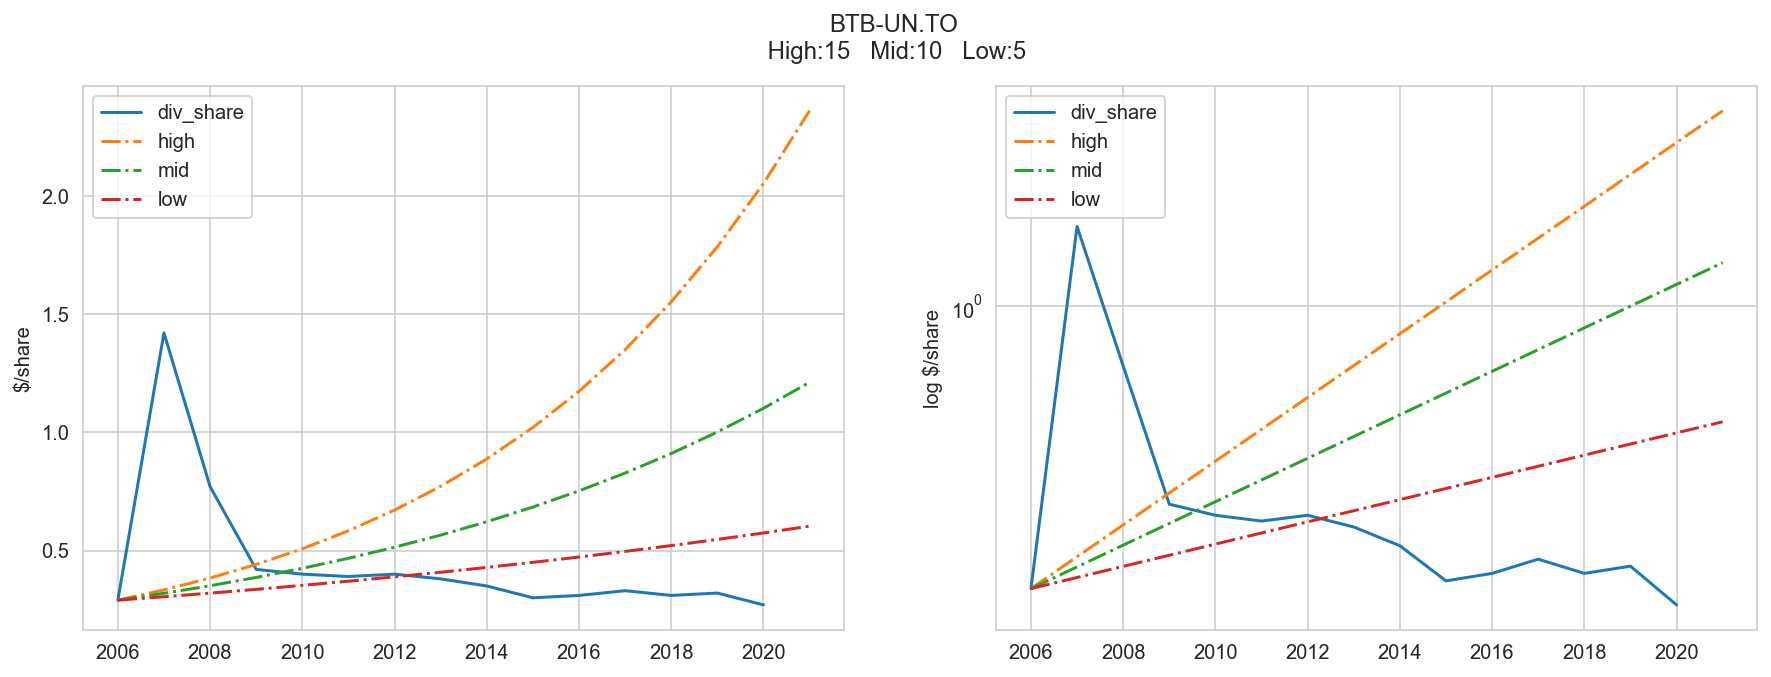

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "BTB-UN.TO", 15, 10, 5, fcf=False)

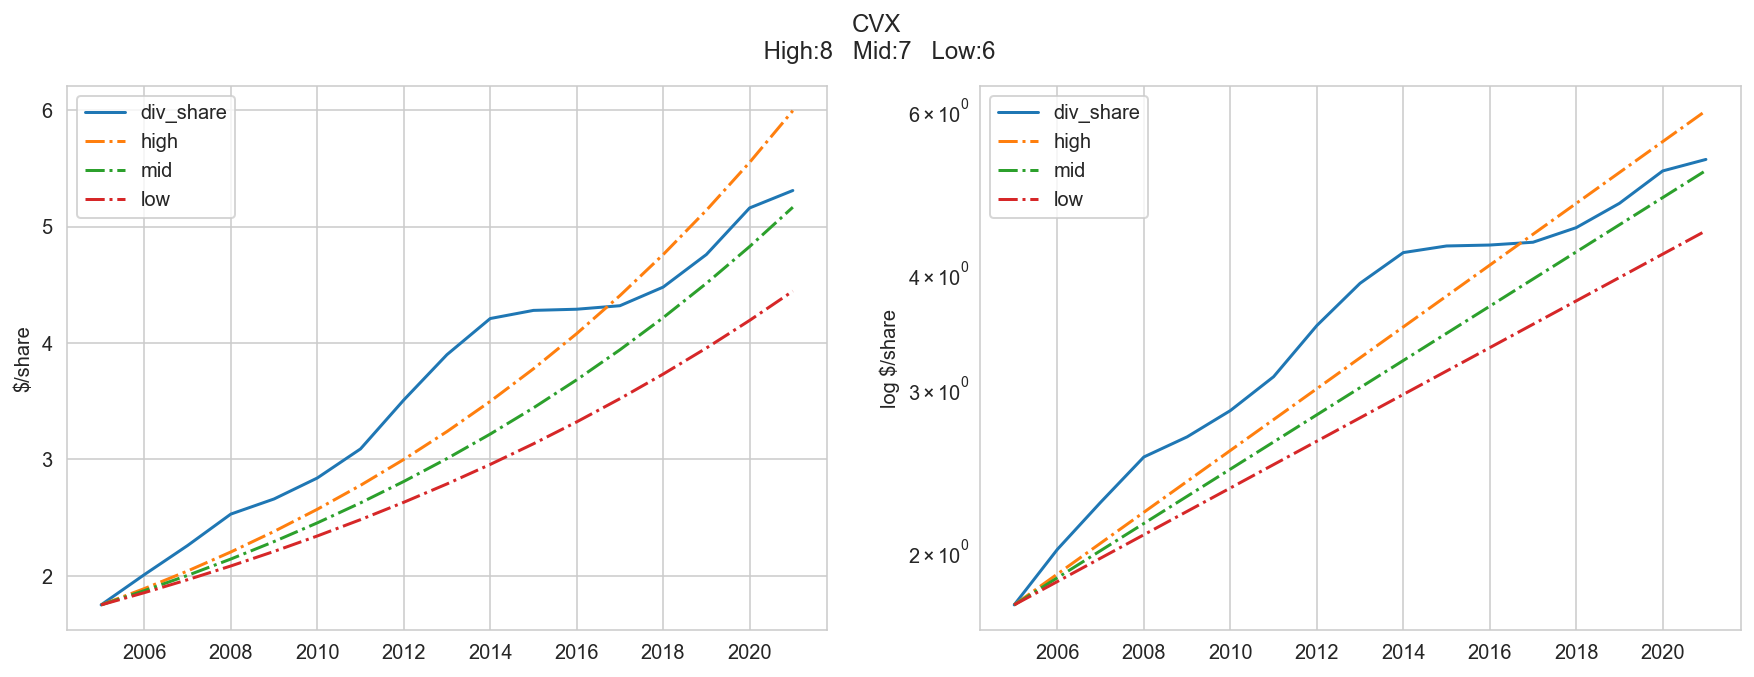

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "CVX", 8, 7, 6, fcf=False)

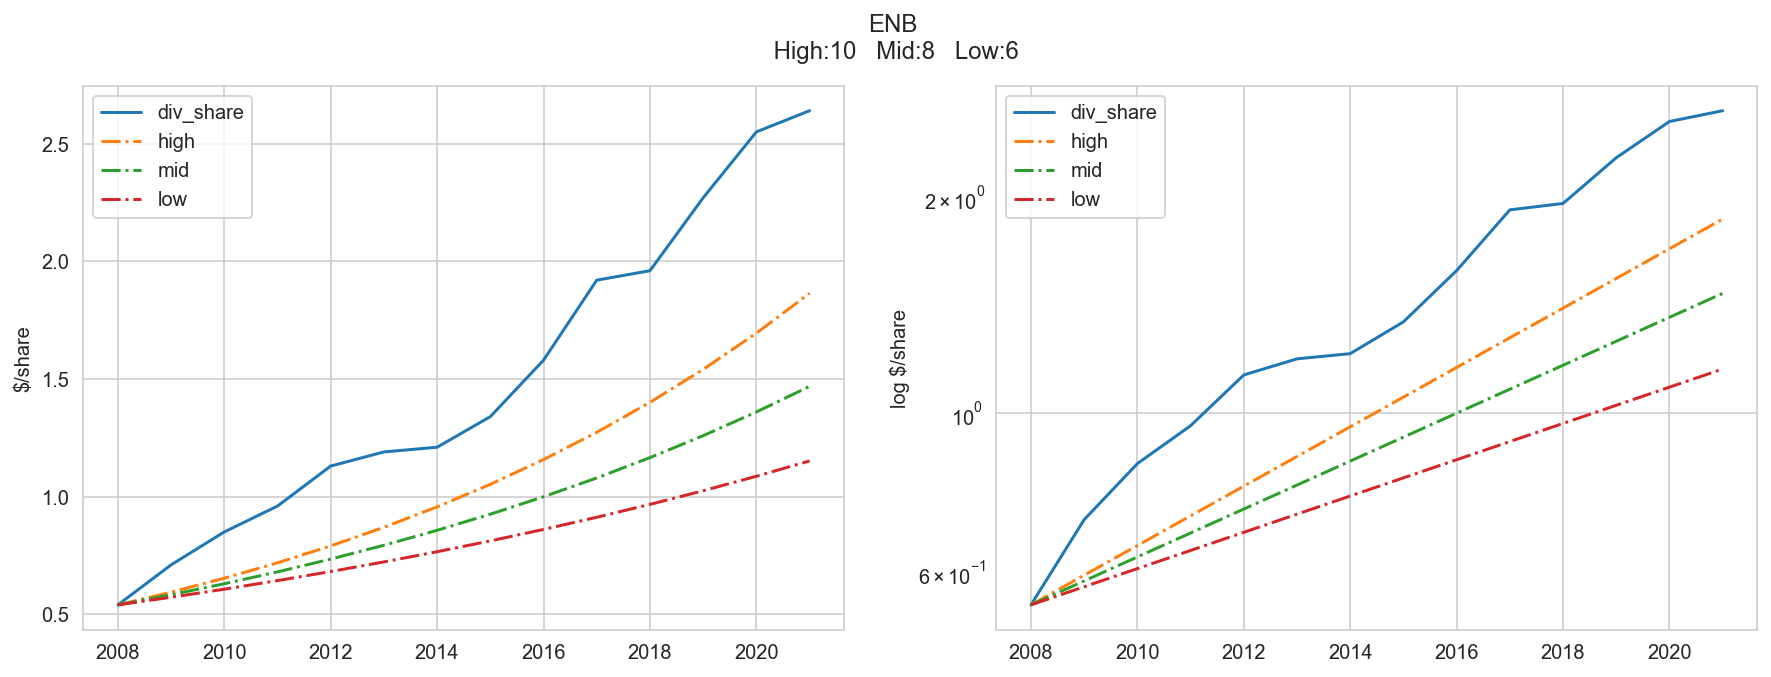

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "ENB", 10, 8, 6, start_at=2008, fcf=False)

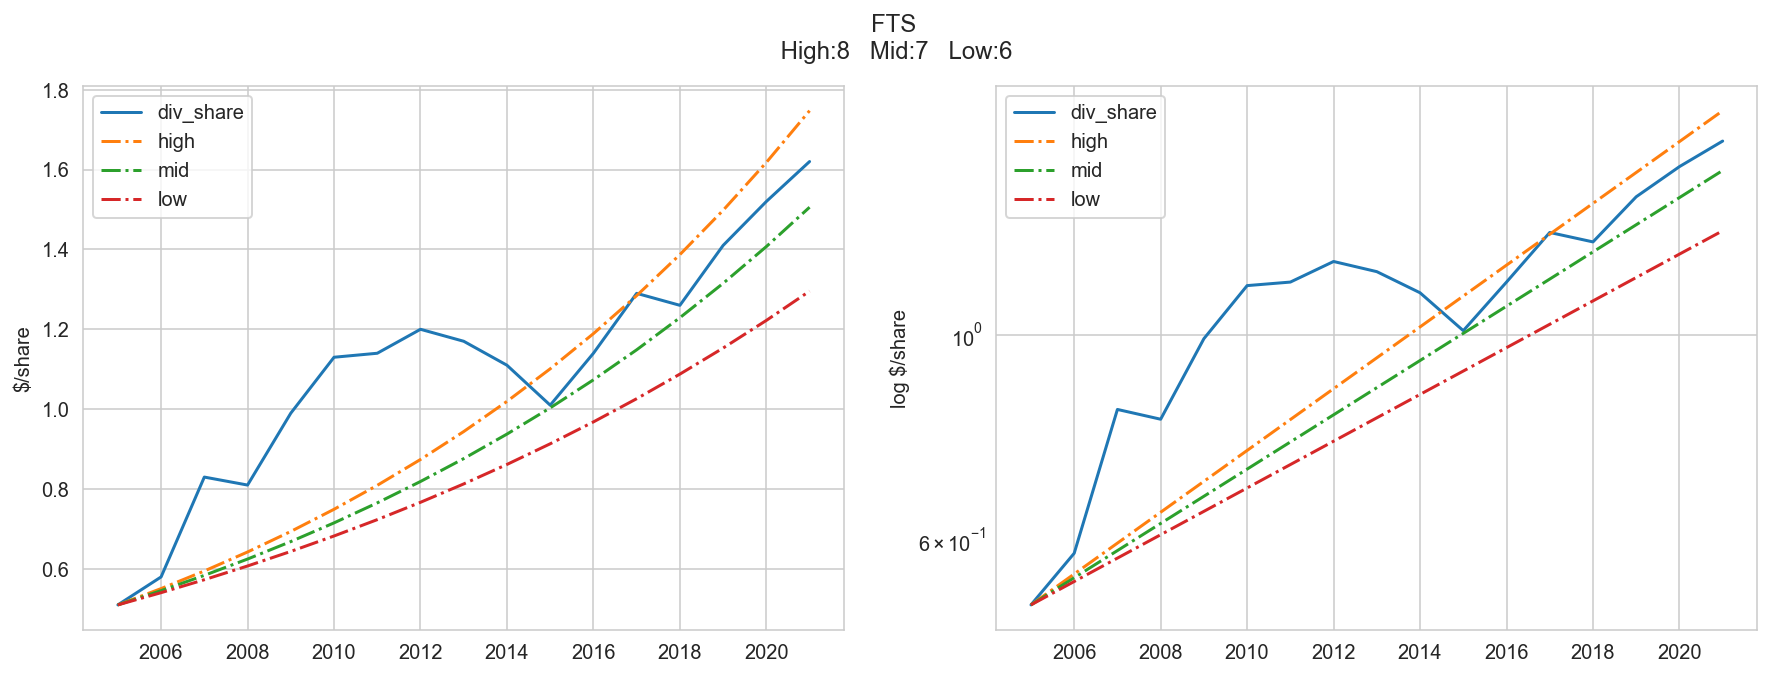

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "FTS", 8, 7, 6, fcf=False)

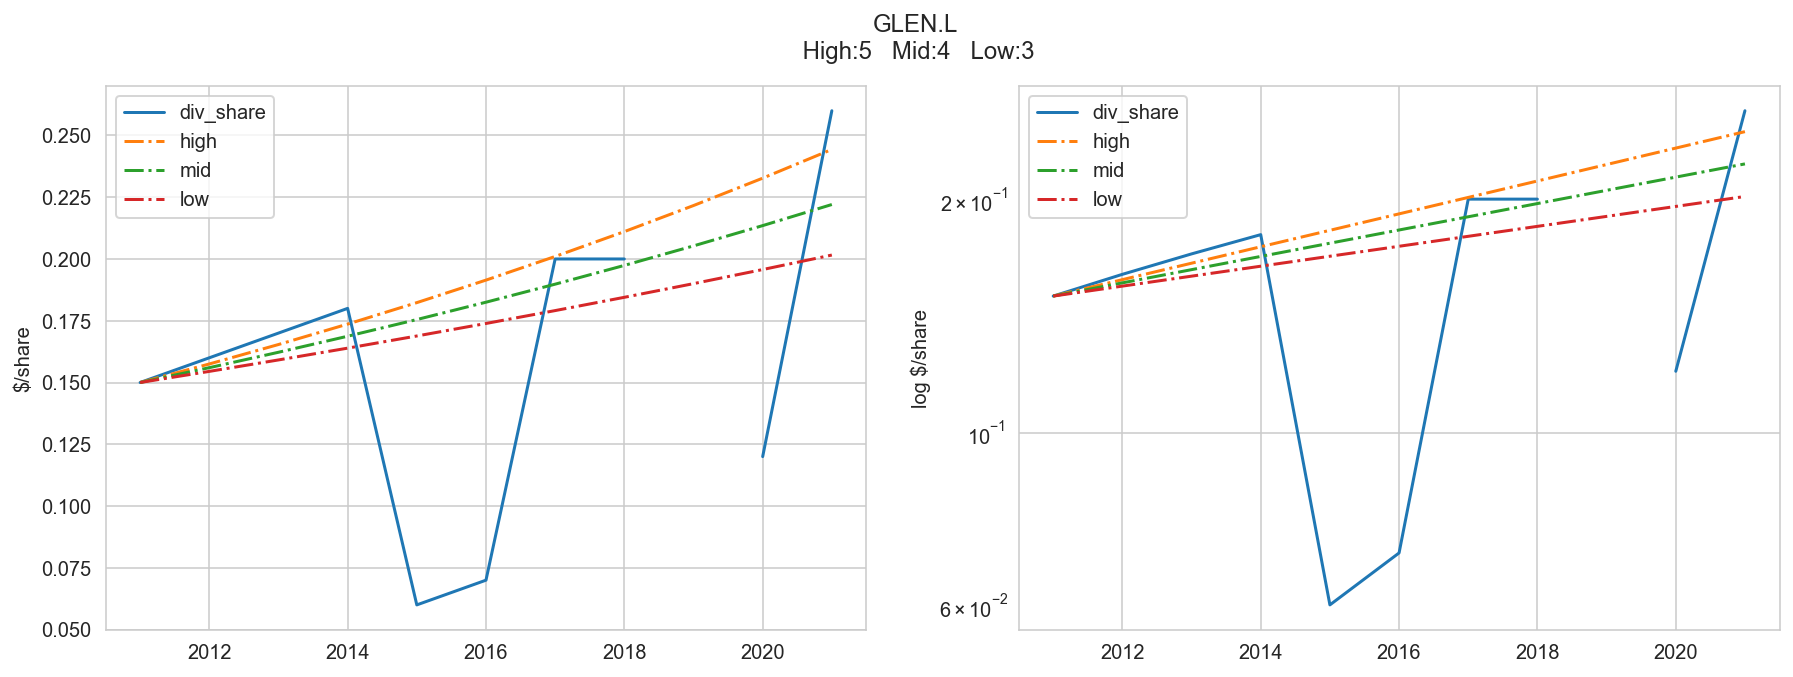

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "GLEN.L", 5, 4, 3, start_at=2011, fcf=False)

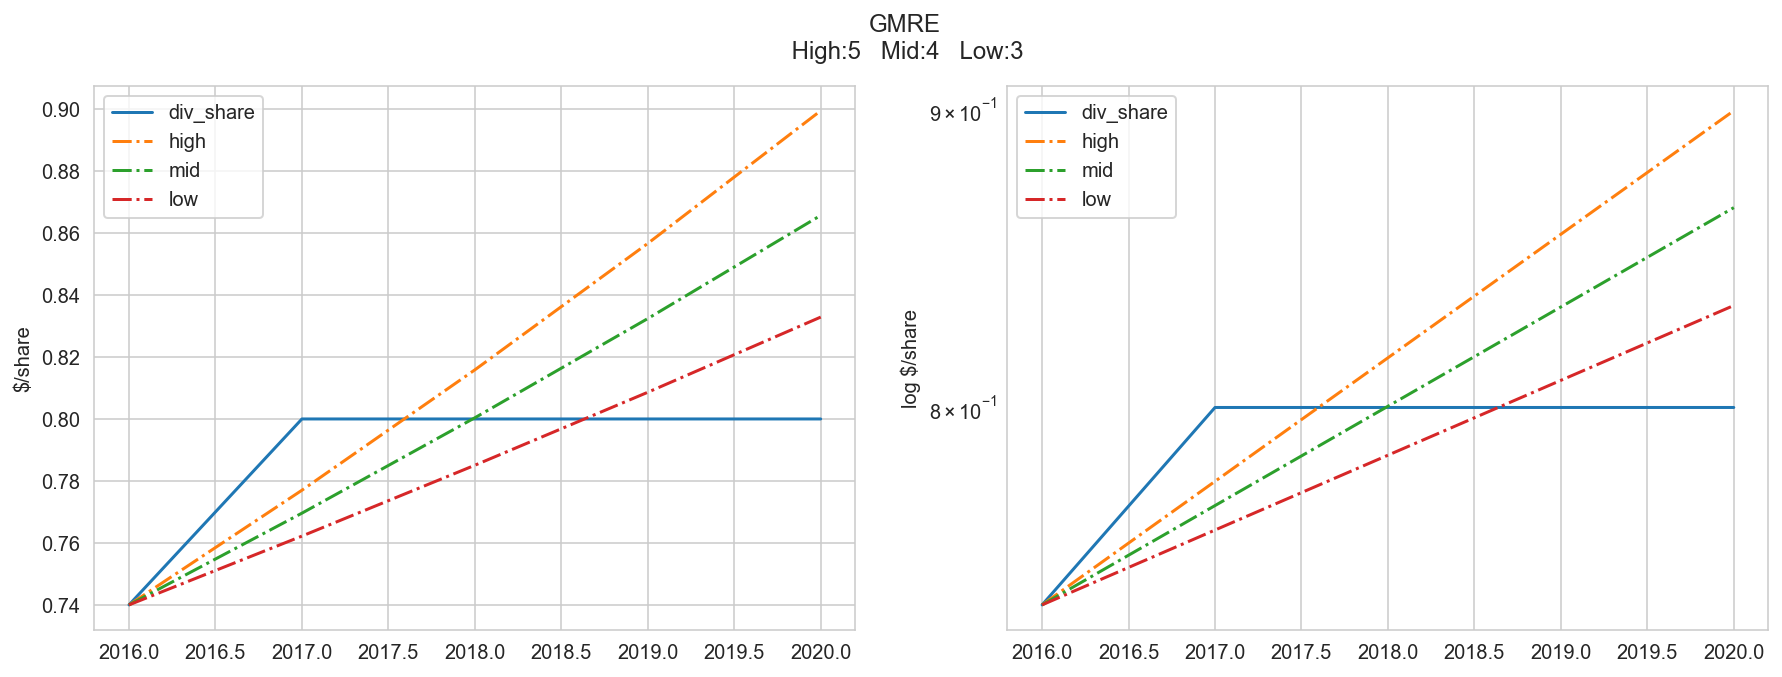

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "GMRE", 5, 4, 3, start_at=2016, fcf=False)

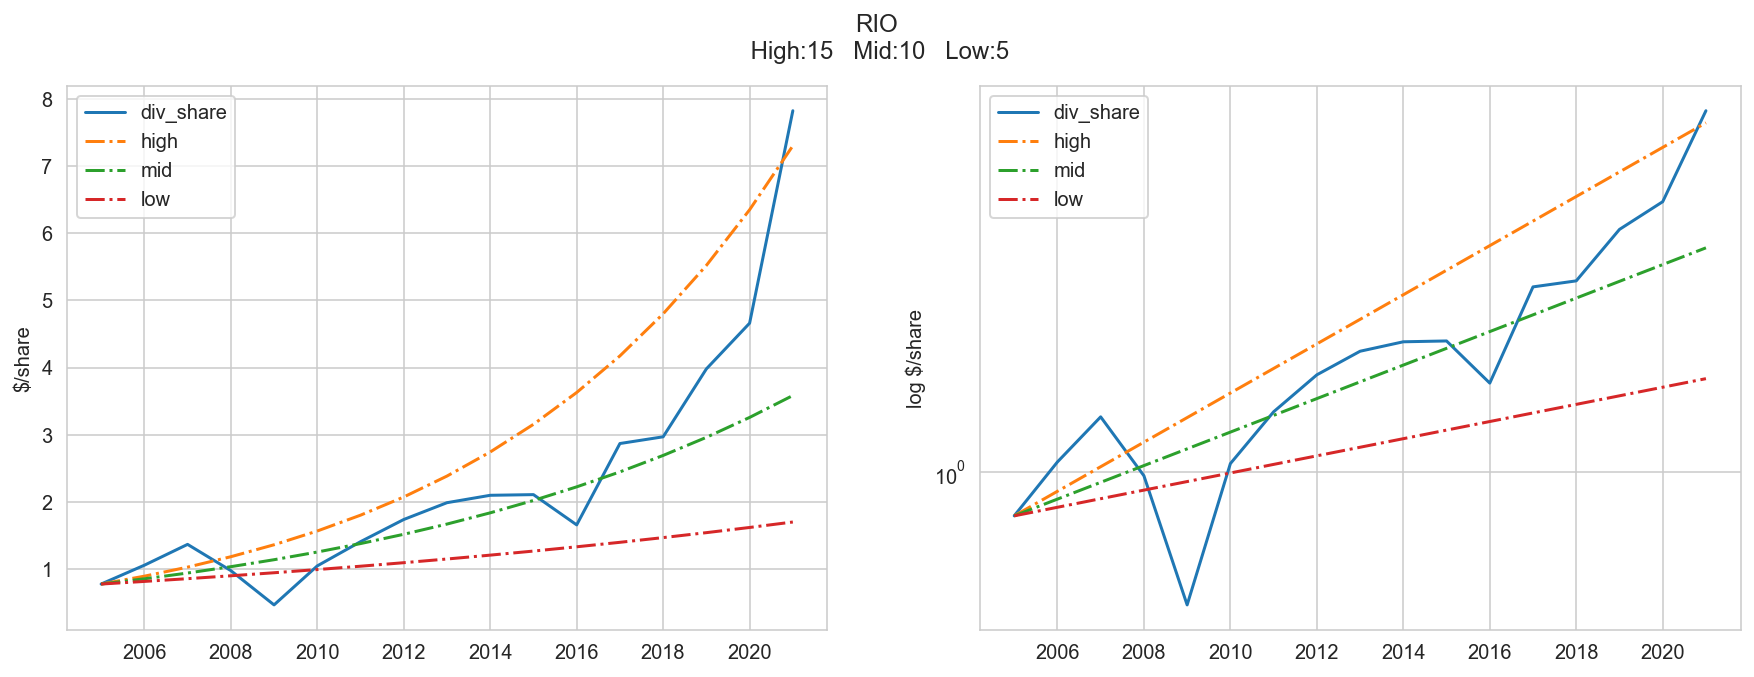

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "RIO", 15, 10, 5, fcf=False)

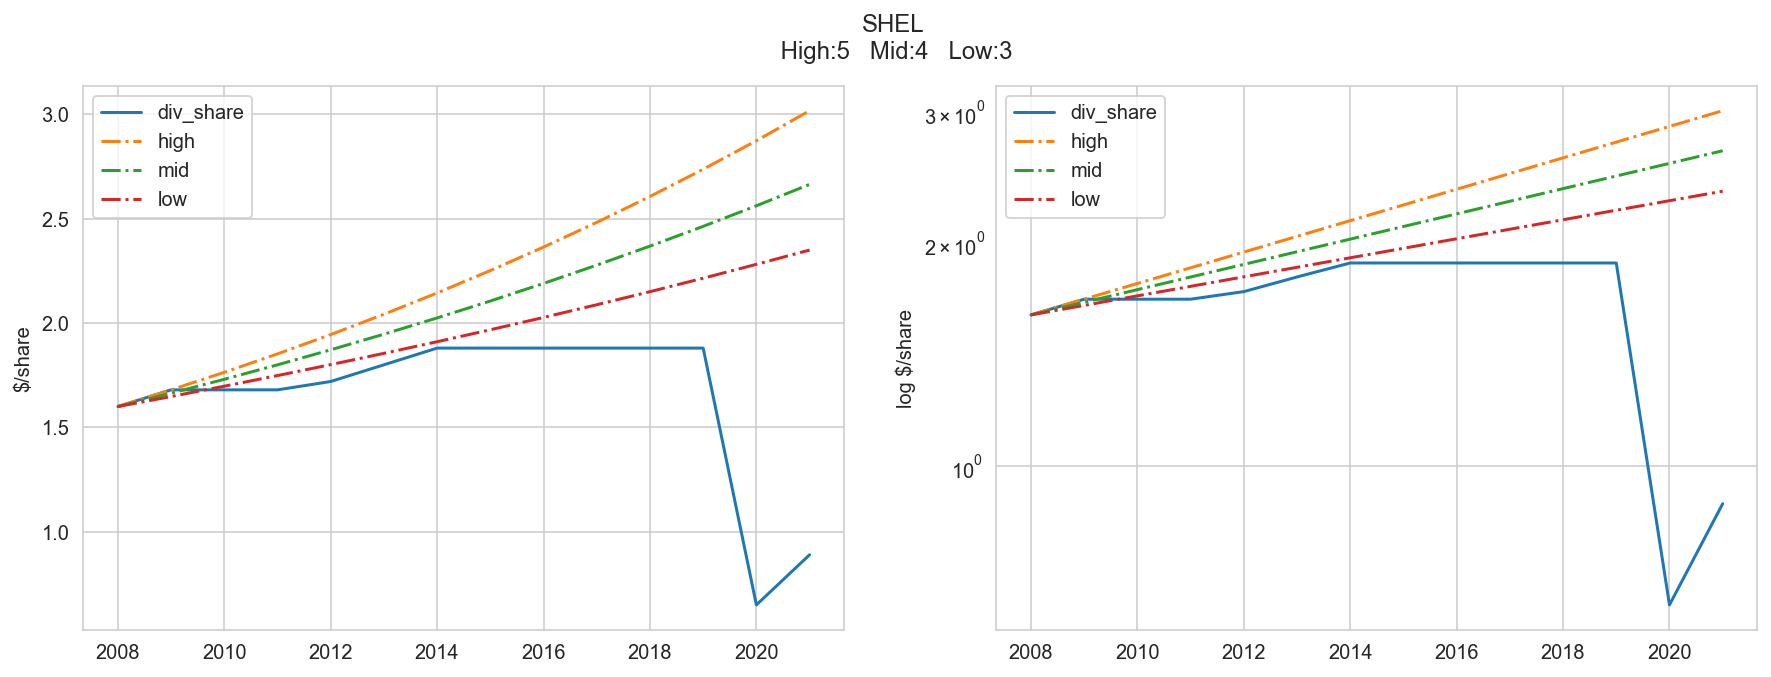

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "SHEL", 5, 4, 3, start_at=2008, fcf=False)

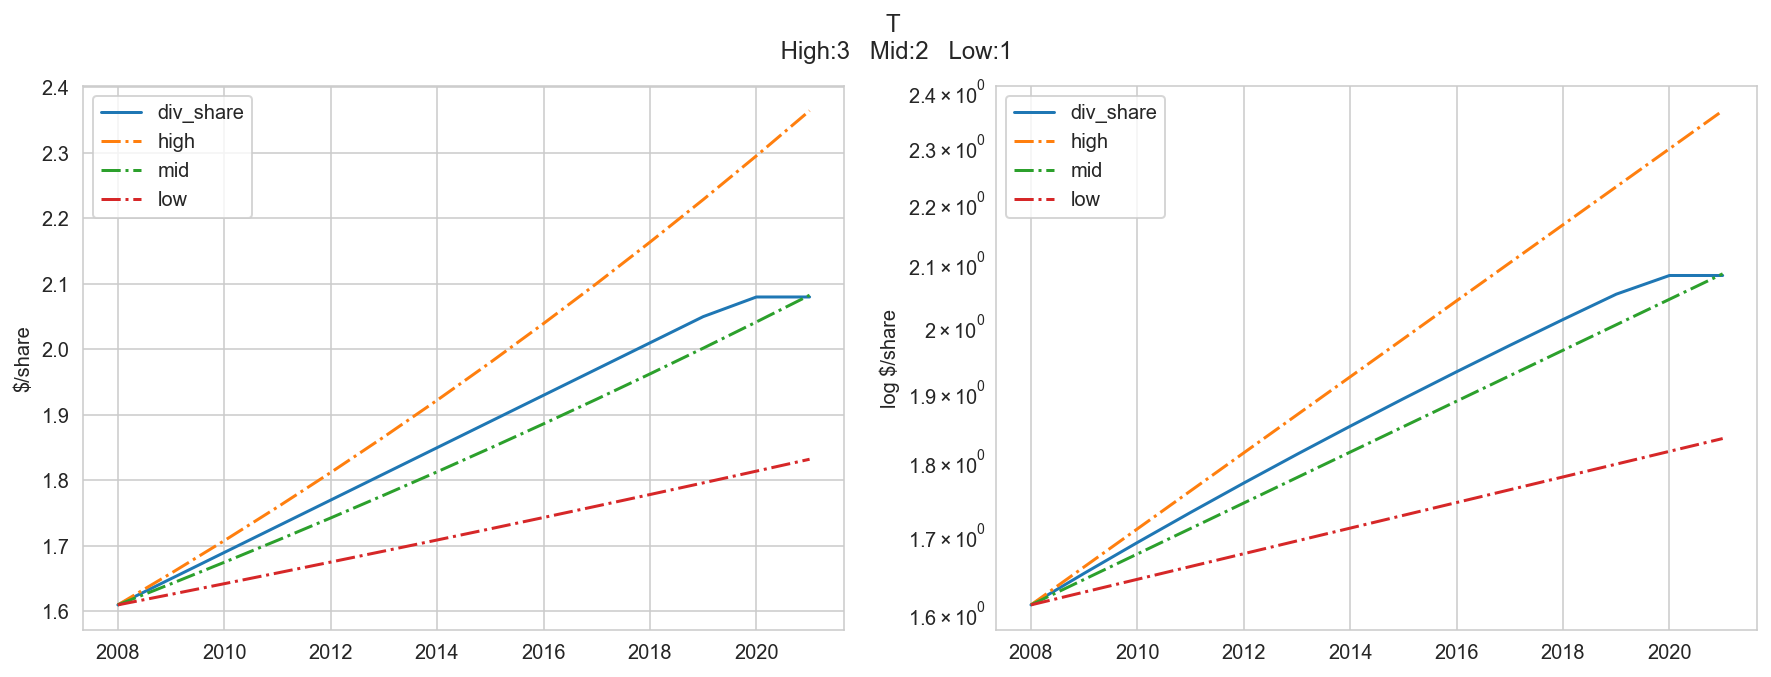

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "T", 3, 2, 1, start_at=2008, fcf=False)

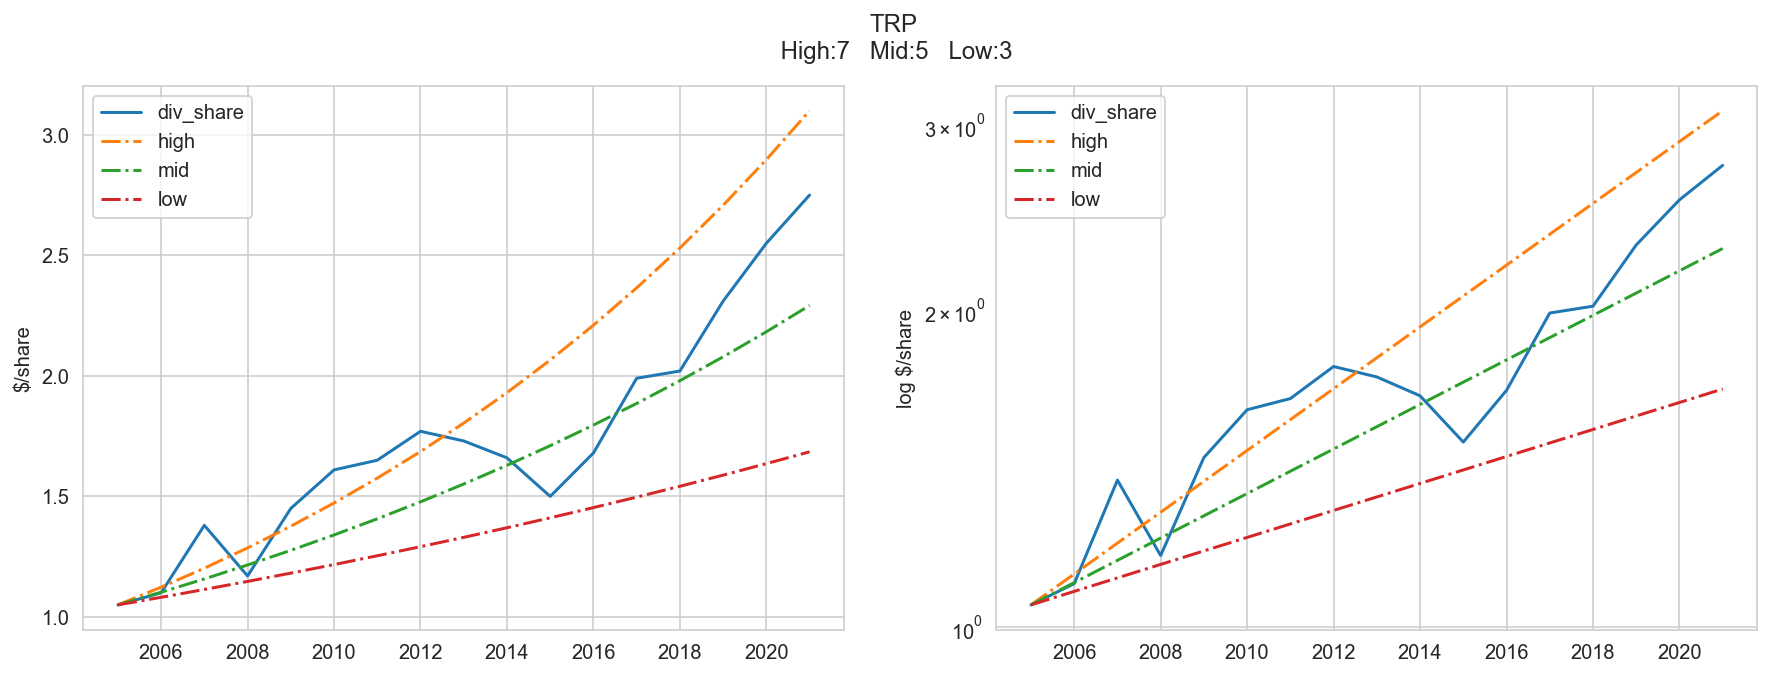

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "TRP", 7, 5, 3, fcf=False)

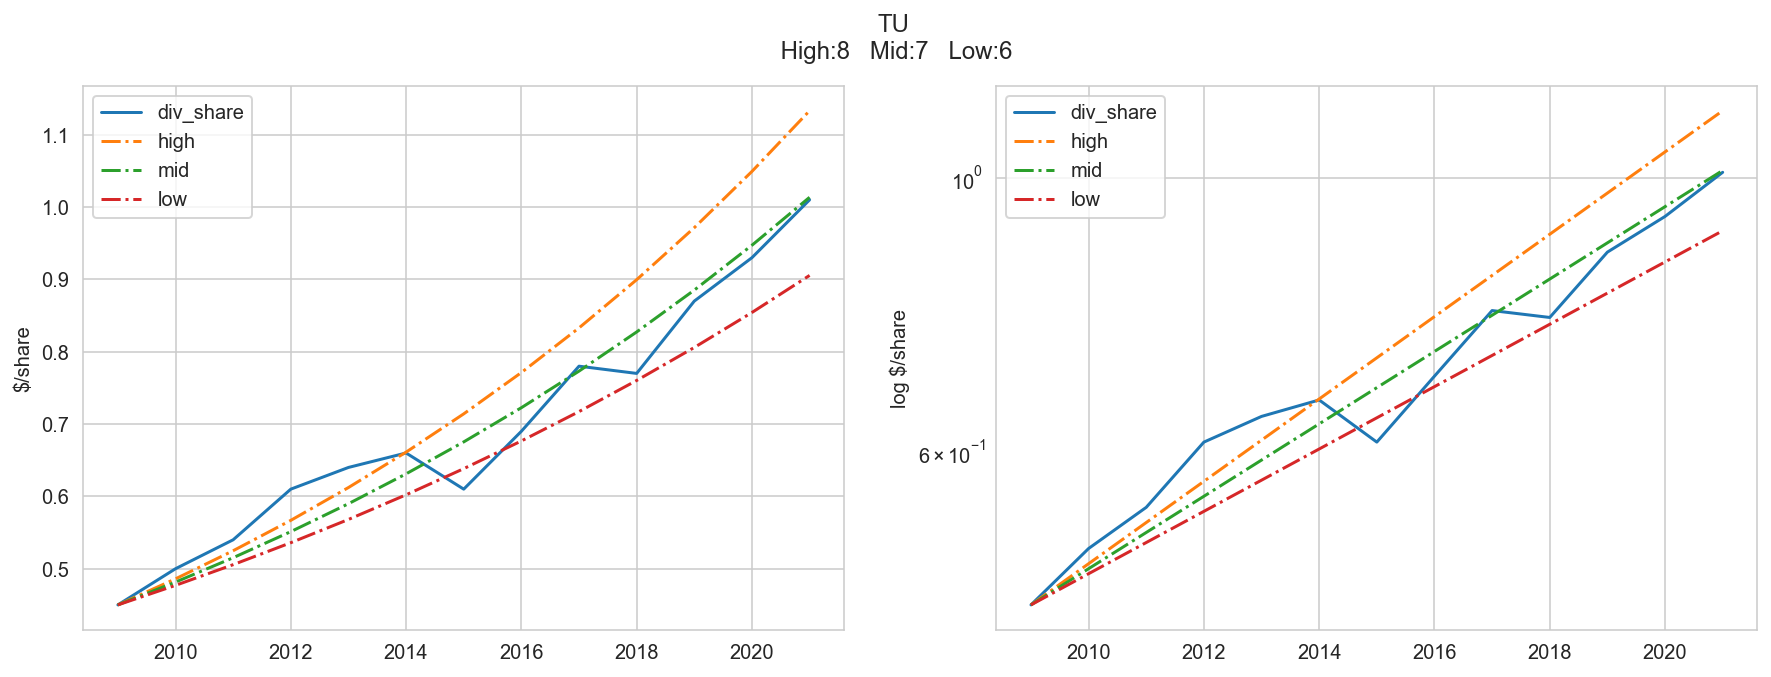

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "TU", 8, 7, 6, start_at=2009, fcf=False)

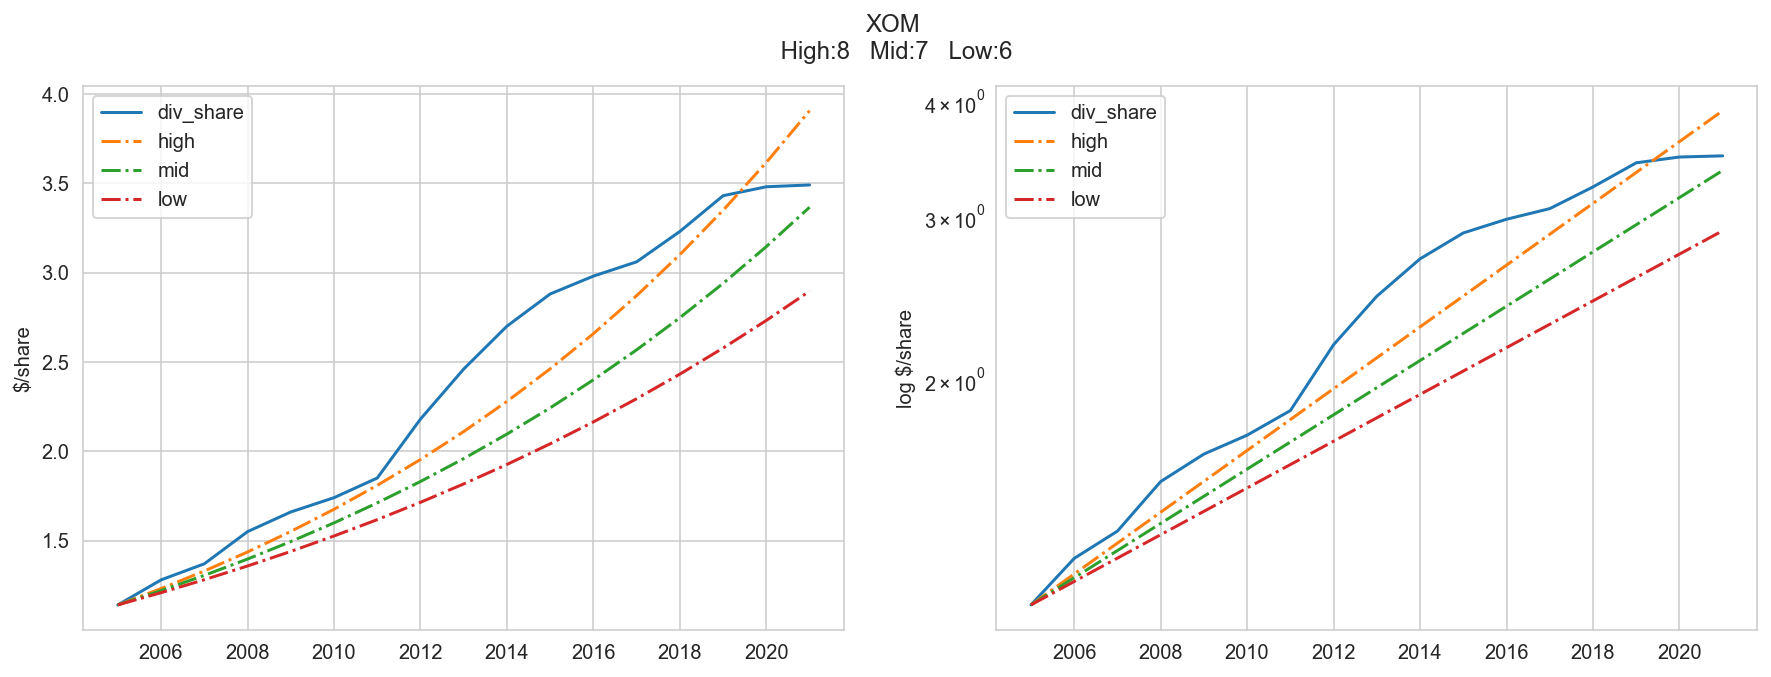

<IPython.core.display.Javascript object>

In [ ]:
sensitivity_plot(company_data, "XOM", 8, 7, 6, fcf=False)

### FCF Starting Point Values

In [ ]:
# Create a FCF dictionary for each company
starting_dict = {}
for key, value in company_data.items():
    try:
        starting_dict[key] = value.loc[value.last_valid_index(), "div_share"]

    except:
        print(key)

<IPython.core.display.Javascript object>

In [ ]:
# Transform the dictionary to a dataframe of start values
df_start = pd.DataFrame.from_dict(
    data=starting_dict, orient="index", columns=["start_value"]
)
df_out = df_start.reset_index().rename(columns={"index": "ticker"})

<IPython.core.display.Javascript object>

In [ ]:
# View latest FCF values
df_out

,ticker,start_value
0,AAL.L,2.89
1,ALA.TO,0.76
2,AQN,0.61
3,AY,1.67
4,BEPC,1.23
5,BIPC,2.07
6,BP.L,0.22
7,BTB-UN.TO,0.27
8,CVX,5.31
9,ENB,2.64


<IPython.core.display.Javascript object>

In [ ]:
# Override FCF values if needed
# ticker = 'AMZN'
# starting_dict[ticker] = 30 # Assumption: the FCF will jump back to trend prior to covid

# # Transform the dictionary to a dataframe of start values
# df_start = pd.DataFrame.from_dict(
#             data=starting_dict, orient="index", columns=["start_value"]
#         )
# df_out=df_start.reset_index().rename(columns={'index':'ticker'})

<IPython.core.display.Javascript object>

In [ ]:
# Final check
df_out

,ticker,start_value
0,AAL.L,2.89
1,ALA.TO,0.76
2,AQN,0.61
3,AY,1.67
4,BEPC,1.23
5,BIPC,2.07
6,BP.L,0.22
7,BTB-UN.TO,0.27
8,CVX,5.31
9,ENB,2.64


<IPython.core.display.Javascript object>

In [ ]:
# Export to disk
df_out.to_csv(output_data / start_file, index=False)

<IPython.core.display.Javascript object>